In [1]:
import pandas as pd
from pathlib import Path
# import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pybedtools
from pybedtools import BedTool
from pathlib import Path

warnings.filterwarnings("ignore")

In [2]:
model_organisms = [f for f in Path("pattern_maximal_abacaba")\
                                       .glob("*.maximal.txt")]

In [3]:
organism_names_all = {
                   'GCF_000002985.6': 'C. elegans',
                   'GCF_000146045.2': 'S. cerevisiae',
                   'GCF_009914755.1': 'H. sapiens',
                   'dm6': 'D. melanogaster',
                   'galGal6': 'G. gallus',
                   'danRer11': 'D. rerio',
                   'GCF_000013425.1': 'S. aureus',
                   'GCF_000240185.1': 'K. pneumoniae',
                   'GCF_000008865.2': 'E. coli'
    }
organism_names_all

{'GCF_000002985.6': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [4]:
from tqdm import tqdm

avoidmers_df = []
nucleotides = {"a", "g", "c", "t"}

for model in tqdm(model_organisms, leave=True, position=0):
    df = pd.read_csv(model)
    if "chm13v2" in model.name or "fr3" in model.name:
        continue
        
    # df = df[df["sequence"].apply(lambda x: all(c in nucleotides for c in x))]
    if "GC" in model.name:
        organism_name = "_".join(model.name.split("_")[:2])
    else:
        organism_name = model.name.split("_")[0]
    
        
    if df.shape[0] == 0:
        continue
        
    df.loc[:, "organism"] = organism_name
    avoidmers_df.append(df)
    
avoidmers_df  = pd.concat(avoidmers_df, axis=0)
avoidmers_df.loc[:, "length"] = avoidmers_df["end"] - avoidmers_df["start"]
avoidmers_df

  7%|█████████▋                                                                                                                                    | 765/11152 [00:02<00:36, 280.96it/s]

KeyboardInterrupt



In [5]:
avoidmers = avoidmers_df[avoidmers_df['organism'] == "sacCer3"][["seqID", "start", "end", "sequence", "length", "type"]]
avoidmers

,seqID,start,end,sequence,length,type
0,chrI,1910,1971,ggtctggagcaataccggtcaacatggtggtgaagtcaccgtagtt...,61,abacaba
1,chrI,1918,1973,gcaataccggtcaacatggtggtgaagtcaccgtagttgaaaacgg...,55,abacaba
2,chrI,2270,2325,ccattccctcatgggttgttgctatttaaacgatcgctgactggca...,55,abacaba
3,chrI,2279,2331,catgggttgttgctatttaaacgatcgctgactggcaccagttcct...,52,abacaba
4,chrI,2627,2679,aacggcttccgcggaggaaatatttccatctcttgaattcgtacaa...,52,abacaba
...,...,...,...,...,...,...
800,chrVI,266877,266930,ttcgctacacaaggtagtgtaaccataagaaatccagttaggaatt...,53,abacaba
801,chrVI,267214,267267,ttcaatgtatccaaggaagttttaggtaatggcaggctaaatcttc...,53,abacaba
802,chrVI,269317,269378,cttacaaaaggattttagcaacgacttcgtctcagaagagttaata...,61,abacaba
803,chrVI,269528,269580,ttagccttttttgatataactgtcggagagttaacaagcggctgga...,52,abacaba


In [5]:
gff_files = {"_".join(f.name.split("_")[:2]): f for f in Path("gff").glob("*.gtf.gz")} | \
            {"_".join(f.name.split("_")[:2]): f for f in Path("gff").glob("*.gff.gz")}
gff_files

{'galGal6.ncbiRefSeq.gtf.gz': PosixPath('gff/galGal6.ncbiRefSeq.gtf.gz'),
 'danRer11.ncbiRefSeq.gtf.gz': PosixPath('gff/danRer11.ncbiRefSeq.gtf.gz'),
 'ce11.ncbiRefSeq.gtf.gz': PosixPath('gff/ce11.ncbiRefSeq.gtf.gz'),
 'dm6.ncbiRefSeq.gtf.gz': PosixPath('gff/dm6.ncbiRefSeq.gtf.gz'),
 'sacCer3.ncbiRefSeq.gtf.gz': PosixPath('gff/sacCer3.ncbiRefSeq.gtf.gz'),
 'fr3.ncbiRefSeq.gtf.gz': PosixPath('gff/fr3.ncbiRefSeq.gtf.gz')}

In [6]:
gtf_ce11 = pd.read_table(gff_files['ce11.ncbiRefSeq.gtf.gz'], comment='#', header=None)
gtf_ce11

,0,1,2,3,4,5,6,7,8
0,chrI,ncbiRefSeq,transcript,3747,3909,.,-,.,"gene_id ""Y74C9A.6""; transcript_id ""NR_001477.2..."
1,chrI,ncbiRefSeq,exon,3747,3909,.,-,.,"gene_id ""Y74C9A.6""; transcript_id ""NR_001477.2..."
2,chrI,ncbiRefSeq,transcript,4221,10148,.,-,.,"gene_id ""homt-1""; transcript_id ""NM_058260.4"";..."
3,chrI,ncbiRefSeq,exon,4221,4358,.,-,.,"gene_id ""homt-1""; transcript_id ""NM_058260.4"";..."
4,chrI,ncbiRefSeq,CDS,4224,4358,.,-,0,"gene_id ""homt-1""; transcript_id ""NM_058260.4"";..."
...,...,...,...,...,...,...,...,...,...
516992,chrX,ncbiRefSeq,CDS,17717328,17717443,.,+,0,"gene_id ""cTel55X.1""; transcript_id ""NM_078463...."
516993,chrX,ncbiRefSeq,exon,17718428,17718647,.,+,.,"gene_id ""cTel55X.1""; transcript_id ""NM_078463...."
516994,chrX,ncbiRefSeq,CDS,17718428,17718644,.,+,1,"gene_id ""cTel55X.1""; transcript_id ""NM_078463...."
516995,chrX,ncbiRefSeq,start_codon,17714968,17714970,.,+,0,"gene_id ""cTel55X.1""; transcript_id ""NM_078463...."


In [9]:
gff_with_exons = {"_".join(f.name.split("_")[:2]): f for f in Path("gff").glob("*.with_exons.gff")}
gff_with_exons

{'GCF_000008865.2': PosixPath('gff/GCF_000008865.2_ASM886v2_genomic.with_exons.gff'),
 'GCF_000013425.1': PosixPath('gff/GCF_000013425.1_ASM1342v1_genomic.with_exons.gff'),
 'GCF_000240185.1': PosixPath('gff/GCF_000240185.1_ASM24018v2_genomic.with_exons.gff')}

In [10]:
for key, path in gff_with_exons.items():
    gff_files.update({key: path})

In [13]:
avoidmers_df_maximal = avoidmers_df.groupby(["organism", "seqID", "end", "sequence", "length", "type"], as_index=False)\
                                            .agg({"start": "min"}).reset_index(drop=True)
avoidmers_df_maximal

,organism,seqID,end,sequence,length,type,start
0,GCF_000008865.2,NC_002127.1,861,tgcatagctatgcagtgagctgaaagcgatcctgacgcatttttcc...,50,abacaba,811
1,GCF_000008865.2,NC_002127.1,2690,aactcctctaaatcagttaccaatggctgctgccagtggcgataag...,50,abacaba,2640
2,GCF_000008865.2,NC_002127.1,2884,gccacgcttcccgaagggagaaaggcggacaggtatccggtaagtg...,51,abacaba,2833
3,GCF_000008865.2,NC_002127.1,3028,gtcgatttttgtgatgctcgtcaggggggcggagcctatggaaaaa...,53,abacaba,2975
4,GCF_000008865.2,NC_002128.1,262,tgttccggaaggtggtatcgatttcacacctcataatggaacgaaa...,53,abacaba,209
...,...,...,...,...,...,...,...
4632526,sacCer3,chrXVI,947451,gctgggagttaccccatctaaagtgccgcattggacggcattcctg...,54,abacaba,947397
4632527,sacCer3,chrXVI,947457,ctgggagttaccccatctaaagtgccgcattggacggcattcctgt...,59,abacaba,947398
4632528,sacCer3,chrXVI,947460,ggagttaccccatctaaagtgccgcattggacggcattcctgtcga...,59,abacaba,947401
4632529,sacCer3,chrXVI,947578,ttgttaccacattggcttgatttggcaaacgttgaagttctcgctg...,54,abacaba,947524


In [14]:
avoidmers_enriched_all = []

for organism, gff_path in gff_files.items():
    
    if "CHM13" in Path(gff_path).name or "fr3" in Path(gff_path).name:
        continue

    organism_ = organism.split('.')[0] if "GC" not in organism else organism
    
    gff_df = pd.read_table(gff_path, 
                           comment="#", 
                           header=None, 
                           names=["seqID", "compartment", "start", "end"],
                          usecols=[0, 2, 3, 4]
                        ).query("compartment == 'transcript' | 'gene' in compartment")
    
    gff_df.loc[:, "start"] = gff_df["start"] - 1
    gff_bed = BedTool.from_dataframe(gff_df[["seqID", "start", "end"]]).sort().merge().fn
    
    avoidmers = avoidmers_df[avoidmers_df['organism'] == organism_][["seqID", "start", "end", "mergedSequence", "length"]]
    
    # if organism_ == "sacCer3" or organism_ == "ce11":
    #    avoidmers.loc[:, "seqID"] = avoidmers["seqID"].apply(lambda y: mapping[y.split("chr")[1]])
    
    avoidmers_enriched = pd.read_table(
                        BedTool.from_dataframe(avoidmers).sort().intersect(gff_bed, wao=True).fn,
                        header=None,
                        names=list(avoidmers.columns) + ["compartment", "geneStart", "geneEnd", "overlap"]
                    )
    avoidmers_enriched.loc[:, "compartment"] = avoidmers_enriched["compartment"].apply(lambda x: "Intergenic" if x == "." else "Genic")
    avoidmers_enriched.loc[:, "organism"] = organism_
    avoidmers_enriched_all.append(avoidmers_enriched)

avoidmers_enriched_all = pd.concat(avoidmers_enriched_all, axis=0)
avoidmers_enriched_all

KeyError: "['mergedSequence'] not in index"

In [7]:
model_organisms = [f for f in Path("pattern_maximal_abacaba").glob("*.maximal.txt")]

# model_organisms
len(model_organisms)

11152

In [8]:
model_organisms = [f for f in Path("pattern_maximal_abacaba").glob("*.maximal.txt")]

avoidmers_maximal = []
for organism in tqdm(model_organisms):
    if "fr3" in organism.name:
        continue

    temp = pd.read_csv(organism)
    if temp.shape[0] == 0:
        continue
        
    avoidmers_maximal.append(temp)
    avoidmers_maximal[-1].loc[:, "organism"] = organism.name.split("_")[0] if "GC" not in organism.name else '_'.join(organism.name.split("_")[:2])
    
avoidmers_maximal = pd.concat(avoidmers_maximal, axis=0)
avoidmers_maximal

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11152/11152 [00:26<00:00, 422.84it/s]


,seqID,start,end,sequence,length,type,organism
0,chrY_DS484197v1_random,1892,1947,cggccccgtcgaaccgtggggtcacgacaatgatgcggataagtag...,55,abacaba,dm6
1,chrY_DS484197v1_random,1897,1957,ccgtcgaaccgtggggtcacgacaatgatgcggataagtagaagct...,60,abacaba,dm6
0,chrUn_DS484797v1,1270,1325,tgtacctcatcgtcagaagaggaatcagtaaataagtggtcggaca...,55,abacaba,dm6
0,chr13_KZ115414v1_alt,488,543,ggttgccatgagggctccatataaaaacatgcatctagatcattca...,55,abacaba,danRer11
1,chr13_KZ115414v1_alt,1711,1761,ttcggccttcaccattaactttaggttaggttgtaagcctaaatgg...,50,abacaba,danRer11
...,...,...,...,...,...,...,...
9,chrUn_KN150374v1,3185,3250,ttaatgtcagtttggtcatcatccagtctgcagctggctcacatta...,65,abacaba,danRer11
10,chrUn_KN150374v1,3190,3257,gtcagtttggtcatcatccagtctgcagctggctcacattacttat...,67,abacaba,danRer11
11,chrUn_KN150374v1,3196,3260,ttggtcatcatccagtctgcagctggctcacattacttatatgacc...,64,abacaba,danRer11
12,chrUn_KN150374v1,6941,6993,catccttaggtcatataagtaatgtgagccagctgcacatttccaa...,52,abacaba,danRer11


In [68]:
files = [f for f in Path("GCF_000008865.2").glob("*")]
df = pd.read_csv(files[0], header=None)

for f in files[1:]:
    temp = pd.read_csv(f, header=None)
    df = pd.concat([temp, df], axis=0)
    
df.columns = ["seqID", "start", "end", "sequence", "length", "type"]
df.sort_values(by=['seqID', 'start'], ascending=True, inplace=True)
df

,seqID,start,end,sequence,length,type
0,NC_002127.1,811,861,tgcatagctatgcagtgagctgaaagcgatcctgacgcatttttcc...,50,abacaba
1,NC_002127.1,2640,2690,aactcctctaaatcagttaccaatggctgctgccagtggcgataag...,50,abacaba
2,NC_002127.1,2833,2884,gccacgcttcccgaagggagaaaggcggacaggtatccggtaagtg...,51,abacaba
3,NC_002127.1,2834,2884,ccacgcttcccgaagggagaaaggcggacaggtatccggtaagtgg...,50,abacaba
4,NC_002127.1,2975,3028,gtcgatttttgtgatgctcgtcaggggggcggagcctatggaaaaa...,53,abacaba
...,...,...,...,...,...,...
147562,NC_002695.2,5497809,5497861,gtaataagttgacagtgatcaccctgttcgcggtcatttggtcaag...,52,abacaba
147563,NC_002695.2,5497810,5497861,taataagttgacagtgatcaccctgttcgcggtcatttggtcaaga...,51,abacaba
147564,NC_002695.2,5497811,5497861,aataagttgacagtgatcaccctgttcgcggtcatttggtcaagaa...,50,abacaba
147565,NC_002695.2,5498222,5498273,tgactaacgaagagttagcgttggctgacgttcttactggtgtgcc...,51,abacaba


In [9]:
organism_names_all

{'GCF_000002985.6': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [23]:
value_counts_avoidmers_per_compartment.loc[:, "organism"] = value_counts_avoidmers_per_compartment['organism'].apply(lambda x: x.split('.')[0] if "GC" not in x else x).map(organism_names_all)
value_counts_avoidmers_per_compartment

,organism,compartment,counts,totalCounts,density
0,E. coli,Genic,14601,15974,91.404783
1,E. coli,Intergenic,1373,15974,8.595217
2,S. aureus,Genic,3420,3618,94.527363
3,S. aureus,Intergenic,198,3618,5.472637
4,K. pneumoniae,Genic,11957,12889,92.769028
5,K. pneumoniae,Intergenic,932,12889,7.230972
6,NaN,Genic,84389,117640,71.734954
7,NaN,Intergenic,33251,117640,28.265046
8,D. rerio,Genic,986549,1663638,59.300701
9,D. rerio,Intergenic,677089,1663638,40.699299


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.barplot(data=value_counts_avoidmers_per_compartment,
            y="density",
            x="organism",
            hue="compartment",
            ax=ax,
            # dodge=False,
            palette={'Genic': '#d61378',
                    'Intergenic': '#3715b0',
                   },
            zorder=3,
            order=value_counts_avoidmers_per_compartment.query("compartment == 'Genic'")\
                                    .sort_values(by=['density'], ascending=False)['organism']\
                                    .tolist()
           )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Avoidmers Percentage (%)")
ax.yaxis.label.set_size(18)
ax.set_xlabel("")
ax.tick_params(axis="both", labelsize=16)
ax.tick_params(axis="x", rotation=60)
ax.legend(title="", prop={"size": 14})

labels = ax.get_xticklabels()
for l in labels:
    l.set_style('italic')
    
save_location = Path("model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/genic_vs_intergenic_perc_avoidmers_model_organisms.png", bbox_inches='tight')

In [10]:
avoidmers_enriched_maximal = []

for organism, gff_path in gff_files.items():
    
    if "CHM13" in Path(gff_path).name or "fr3" in Path(gff_path).name:
        continue

    print(organism)
    organism_ = organism.split('.')[0] if "GC" not in organism else organism    
    gff_df = pd.read_table(gff_path, 
                           comment="#", 
                           header=None, 
                           names=["seqID", "compartment", "start", "end"],
                           usecols=[0, 2, 3, 4]
                          ).query("compartment == 'transcript' | 'gene' in compartment")
    
    gff_df.loc[:, "start"] = gff_df["start"] - 1
    gff_bed = BedTool.from_dataframe(gff_df[["seqID", "start", "end"]]).sort().merge().fn
    
    avoidmers = avoidmers_maximal[avoidmers_maximal['organism'] == organism_][["seqID", "start", "end", "sequence", "length"]]
    
    # if organism_ == "sacCer3" or organism_ == "ce11":
    #    avoidmers.loc[:, "seqID"] = avoidmers["seqID"].apply(lambda y: mapping[y.split("chr")[1]])
    
    avoidmers_enriched = pd.read_table(
                        BedTool.from_dataframe(avoidmers).sort().intersect(gff_bed, wao=True).fn,
                        header=None,
                        names=list(avoidmers.columns) + ["compartment", "geneStart", "geneEnd", "overlap"]
                    )
    avoidmers_enriched.loc[:, "compartment"] = avoidmers_enriched["compartment"].apply(lambda x: "Intergenic" if x == "." else "Genic")
    avoidmers_enriched.loc[:, "organism"] = organism_
    avoidmers_enriched_maximal.append(avoidmers_enriched)
    

avoidmers_enriched_maximal = pd.concat(avoidmers_enriched_maximal, axis=0)
avoidmers_enriched_maximal

galGal6.ncbiRefSeq.gtf.gz
danRer11.ncbiRefSeq.gtf.gz
ce11.ncbiRefSeq.gtf.gz
dm6.ncbiRefSeq.gtf.gz
sacCer3.ncbiRefSeq.gtf.gz


,seqID,start,end,sequence,length,compartment,geneStart,geneEnd,overlap,organism
0,chr1,19541,19592,ataggatgccatggtttgtaacttcgctattggcattccacgtcgt...,51,Genic,19330,224006,51,galGal6
1,chr1,21188,21238,agccagtgtcactgcagccttcaaaaagggcaagaaggaggatcct...,50,Genic,19330,224006,50,galGal6
2,chr1,22663,22718,ccaacggaaatgccggtctcctgtgttgcaccgtaattcccgggca...,55,Genic,19330,224006,55,galGal6
3,chr1,22743,22793,ggtcgcacttattttcagggtgtaacgagcgtccagttgccctcag...,50,Genic,19330,224006,50,galGal6
4,chr1,22749,22803,acttattttcagggtgtaacgagcgtccagttgccctcagatcacg...,54,Genic,19330,224006,54,galGal6
...,...,...,...,...,...,...,...,...,...,...
34177,chrXVI,947397,947451,gctgggagttaccccatctaaagtgccgcattggacggcattcctg...,54,Genic,944602,947701,54,sacCer3
34178,chrXVI,947398,947457,ctgggagttaccccatctaaagtgccgcattggacggcattcctgt...,59,Genic,944602,947701,59,sacCer3
34179,chrXVI,947401,947460,ggagttaccccatctaaagtgccgcattggacggcattcctgtcga...,59,Genic,944602,947701,59,sacCer3
34180,chrXVI,947524,947578,ttgttaccacattggcttgatttggcaaacgttgaagttctcgctg...,54,Genic,944602,947701,54,sacCer3


In [11]:
avoidmers_enriched_maximal['compartment'].value_counts()

compartment
Genic         2805253
Intergenic    1779358
Name: count, dtype: int64

In [12]:
avoidmers_enriched_maximal.iloc[0]['sequence']

'ataggatgccatggtttgtaacttcgctattggcattccacgtcgtaacgt'

In [13]:
organism_names_all

{'GCF_000002985.6': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [26]:
from collections import defaultdict

densities = defaultdict(list)

for length in tqdm(range(50, 101), total=51):
    temp = avoidmers_enriched_maximal[avoidmers_enriched_maximal['length'] >= length]
    value_counts_avoidmers = temp.groupby(["organism"], as_index=False).agg(totalCounts=("overlap", "count"))
    value_counts_avoidmers_per_compartment = temp.groupby(["organism", "compartment"], as_index=False)\
                                                                   .agg(counts=("overlap", "count"))\
                                                .merge(value_counts_avoidmers, on="organism", how="left")\
                                                .assign(density=lambda ds: 1e2 * ds['counts'].div(ds['totalCounts']))
    
    value_counts_avoidmers_per_compartment.loc[:, "organism"] = value_counts_avoidmers_per_compartment['organism']\
                                            .apply(lambda x: x.split('.')[0] if "GC" not in x else x)\
                                            .apply(lambda x: organism_names_all.get(x, x))

    for _, row in value_counts_avoidmers_per_compartment.iterrows():
        organism = row['organism']
        compartment = row['compartment']
        density = float(row['density'])

        densities['organism'].append(organism)
        densities['compartment'].append(compartment)
        densities['density'].append(density)
        densities['length'].append(length)

densities = pd.DataFrame(densities)
densities

  6%|████████▋                                                                                                                                           | 3/51 [00:04<01:17,  1.62s/it]

KeyboardInterrupt



In [47]:
densities['organism'].unique()

array(['E. coli', 'S. aureus', 'K. pneumoniae', 'ce11', 'D. rerio',
       'D. melanogaster', 'G. gallus', 'sacCer3'], dtype=object)

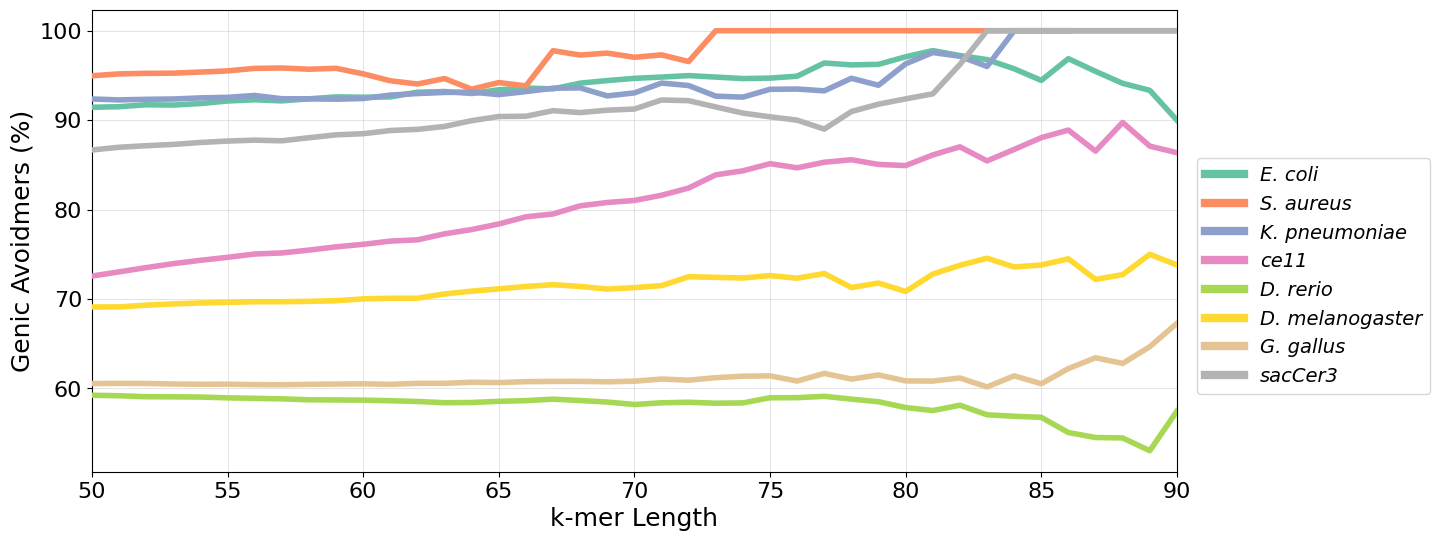

In [51]:
import copy

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

genic_percentage = densities[densities['compartment'] == 'Genic'].query("length <= 90")
sns.lineplot(data=genic_percentage, x="length",
                             y="density",
                             hue="organism",
                             ax=ax,
                             zorder=3,
                             lw=4.0,
             palette=sns.color_palette("Set2")
            )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Genic Avoidmers (%)")
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", labelsize=16)
ax.set_xlabel("k-mer Length")

# get the legend object
# leg = ax.legend()

# change the line width for the legend
# for line in leg.get_lines():
#     line.set_linewidth(4.0)
# ax.legend(title="", prop={"size": 14}, bbox_to_anchor=(1.01, 0.7))
# obtain the handles and labels from the figure
handles, labels = ax.get_legend_handles_labels()
# copy the handles
ax.set_xlim(xmin=50, xmax=90)
handles = [copy.copy(ha) for ha in handles ]
# set the linewidths to the copies
[ha.set_linewidth(6) for ha in handles ]
# put the copies into the legend
leg = plt.legend(handles=handles, prop={"size": 14, 'style': 'italic'}, bbox_to_anchor=(1.01, 0.7), labels=labels)

ax.xaxis.label.set_size(18)
save_location = Path("model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/avoidmers_genic_percentage_vs_length_model_organisms.png", bbox_inches='tight')

# Avoidmer Density per Genomic Compartment - Model Organisms

In [14]:
gff_files

{'galGal6.ncbiRefSeq.gtf.gz': PosixPath('gff/galGal6.ncbiRefSeq.gtf.gz'),
 'danRer11.ncbiRefSeq.gtf.gz': PosixPath('gff/danRer11.ncbiRefSeq.gtf.gz'),
 'ce11.ncbiRefSeq.gtf.gz': PosixPath('gff/ce11.ncbiRefSeq.gtf.gz'),
 'dm6.ncbiRefSeq.gtf.gz': PosixPath('gff/dm6.ncbiRefSeq.gtf.gz'),
 'sacCer3.ncbiRefSeq.gtf.gz': PosixPath('gff/sacCer3.ncbiRefSeq.gtf.gz'),
 'fr3.ncbiRefSeq.gtf.gz': PosixPath('gff/fr3.ncbiRefSeq.gtf.gz')}

In [15]:
chromosome_sizes = pd.read_table("genome_chromosome_sizes.txt")
chromosome_sizes

,organism,seqID,length,lengthOri,diff
0,ce11,chrI,15072434,15072434,0
1,ce11,chrII,15279421,15279421,0
2,ce11,chrIII,13783801,13783801,0
3,ce11,chrIV,17493829,17493829,0
4,ce11,chrV,20924180,20924180,0
...,...,...,...,...,...
11111,sacCer3,chrXIII,924431,924431,0
11112,sacCer3,chrXIV,784333,784333,0
11113,sacCer3,chrXV,1091291,1091291,0
11114,sacCer3,chrXVI,948066,948066,0


In [16]:
additional_gff = chromosome_sizes.copy()
additional_gff.loc[:, "start"] = 1
additional_gff = additional_gff.rename(columns={"length": "end"})
additional_gff.loc[:, "compartment"] = "region"
additional_gff.drop(columns=["lengthOri", "diff"], inplace=True)
additional_gff

,organism,seqID,end,start,compartment
0,ce11,chrI,15072434,1,region
1,ce11,chrII,15279421,1,region
2,ce11,chrIII,13783801,1,region
3,ce11,chrIV,17493829,1,region
4,ce11,chrV,20924180,1,region
...,...,...,...,...,...
11111,sacCer3,chrXIII,924431,1,region
11112,sacCer3,chrXIV,784333,1,region
11113,sacCer3,chrXV,1091291,1,region
11114,sacCer3,chrXVI,948066,1,region


In [20]:
avoidmers_maximal

,seqID,start,end,sequence,length,type,organism
0,chrY_DS484197v1_random,1892,1947,cggccccgtcgaaccgtggggtcacgacaatgatgcggataagtag...,55,abacaba,dm6
1,chrY_DS484197v1_random,1897,1957,ccgtcgaaccgtggggtcacgacaatgatgcggataagtagaagct...,60,abacaba,dm6
0,chrUn_DS484797v1,1270,1325,tgtacctcatcgtcagaagaggaatcagtaaataagtggtcggaca...,55,abacaba,dm6
0,chr13_KZ115414v1_alt,488,543,ggttgccatgagggctccatataaaaacatgcatctagatcattca...,55,abacaba,danRer11
1,chr13_KZ115414v1_alt,1711,1761,ttcggccttcaccattaactttaggttaggttgtaagcctaaatgg...,50,abacaba,danRer11
...,...,...,...,...,...,...,...
9,chrUn_KN150374v1,3185,3250,ttaatgtcagtttggtcatcatccagtctgcagctggctcacatta...,65,abacaba,danRer11
10,chrUn_KN150374v1,3190,3257,gtcagtttggtcatcatccagtctgcagctggctcacattacttat...,67,abacaba,danRer11
11,chrUn_KN150374v1,3196,3260,ttggtcatcatccagtctgcagctggctcacattacttatatgacc...,64,abacaba,danRer11
12,chrUn_KN150374v1,6941,6993,catccttaggtcatataagtaatgtgagccagctgcacatttccaa...,52,abacaba,danRer11


In [21]:
from tqdm import tqdm
avoidmers_coverage_all = []

for organism, gff_path in tqdm(gff_files.items(), leave=True, total=len(gff_files)):
    gff_path = Path(gff_path)
    # print(organism)

    if "CHM13v2" in gff_path.name or "fr3" in gff_path.name:
        continue
    
    organism_ = organism.split('.')[0] if "GC" not in organism else organism
    print(organism_)
    gff_df = pd.read_table(gff_path, 
                           comment="#", 
                           header=None, 
                           names=["seqID", "compartment", "start", "end"],
                          usecols=[0, 2, 3, 4],
                           dtype={"start": int, "end": int}
                          )

    valid_compartments = {"transcript", "region", "CDS", "exon", "gene", "pseudogene"}
    gff_df = gff_df[gff_df["compartment"].isin(valid_compartments)]
    gff_df["compartment"] = gff_df["compartment"].replace("pseudogene", "gene").replace("transcript", "gene")
    merged_gff = []

    obtained_compartments = gff_df["compartment"].unique()

    if "region" not in obtained_compartments:
        additional_temp = additional_gff[additional_gff["organism"] == organism_].drop(columns=['organism'])    
        gff_df = pd.concat([gff_df, additional_temp], axis=0)
    
    gff_df.loc[:, "start"] = gff_df["start"] - 1
    for compartment in gff_df["compartment"].unique():
        temp = gff_df[gff_df["compartment"] == compartment][["seqID", "start", "end"]]
        
        temp_gff = pd.read_table(
            BedTool.from_dataframe(temp[["seqID", "start", "end"]]).sort().merge().fn,
            header=None,
            names=["seqID", "start", "end"]
        )
        temp_gff.loc[:, "compartment"] = compartment
        merged_gff.append(temp_gff)
    
    merged_gff = pd.concat(merged_gff, axis=0)
    merged_gff_bed = BedTool.from_dataframe(merged_gff).sort()
    avoidmers = avoidmers_maximal[avoidmers_maximal['organism'] == organism_][["seqID", "start", "end", "sequence", "length", "type"]]
        
    avoidmers_bed = BedTool.from_dataframe(avoidmers)
    avoidmers_coverage = pd.read_table(
                        merged_gff_bed.coverage(avoidmers_bed).fn,
                        header=None,
                        names=list(merged_gff.columns) + ["totalHits", "overlappingBp", "compartmentLength", "coverage"]
                        )
    avoidmers_coverage.loc[:, "coverage"] = 1e6 * avoidmers_coverage["coverage"]
    avoidmers_coverage.loc[:, "compartment"] = avoidmers_coverage["compartment"].replace("gene", "Gene")\
                                                                                .replace("exon", "Exon")\
                                                                                .replace("region", "Genome")
    avoidmers_coverage.loc[:, "organism"] = organism_
    avoidmers_coverage_all.append(avoidmers_coverage)
    
avoidmers_coverage_all = pd.concat(avoidmers_coverage_all, axis=0)
avoidmers_coverage_all

  0%|                                                                                                                                                             | 0/6 [00:00<?, ?it/s]

galGal6


 17%|████████████████████████▊                                                                                                                            | 1/6 [00:22<01:52, 22.49s/it]

danRer11


 33%|█████████████████████████████████████████████████▋                                                                                                   | 2/6 [00:49<01:40, 25.09s/it]

ce11


 50%|██████████████████████████████████████████████████████████████████████████▌                                                                          | 3/6 [00:55<00:49, 16.37s/it]

dm6


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 4/6 [01:01<00:24, 12.17s/it]

sacCer3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:02<00:00, 10.44s/it]


,seqID,start,end,compartment,totalHits,overlappingBp,compartmentLength,coverage,organism
0,chr1,0,197608386,Genome,342759,14839565,197608386,75095.8,galGal6
1,chr1,5317,11438,Gene,0,0,6121,0.0,galGal6
2,chr1,5317,5524,Exon,0,0,207,0.0,galGal6
3,chr1,5320,5524,CDS,0,0,204,0.0,galGal6
4,chr1,6754,6829,CDS,0,0,75,0.0,galGal6
...,...,...,...,...,...,...,...,...,...
19127,chrXVI,943198,944185,CDS,2,107,987,108409.3,sacCer3
19128,chrXVI,943198,944188,Exon,2,107,990,108080.8,sacCer3
19129,chrXVI,944602,947701,Exon,14,431,3099,139077.1,sacCer3
19130,chrXVI,944602,947701,Gene,14,431,3099,139077.1,sacCer3


In [ ]:
avoidmers_coverage_all['organism'].unique()

In [ ]:
avoidmers_coverage_all.loc[:, "name"] = avoidmers_coverage_all['organism'].apply(lambda x: x.split('.')[0] if "GC" not in x else x)\
                                                                          .apply(lambda x: organism_names_all.get(x, x))
avoidmers_coverage_all

In [ ]:
organism_names_all

In [ ]:
organism_names_all.update({"ce11": "C. elegans", "sacCer3": "S. cerevisiae"})

In [ ]:
avoidmers_coverage_all[avoidmers_coverage_all['name'] == 'D. rerio']

In [ ]:
avoidmers_coverage_all.reset_index(drop=True, inplace=True)

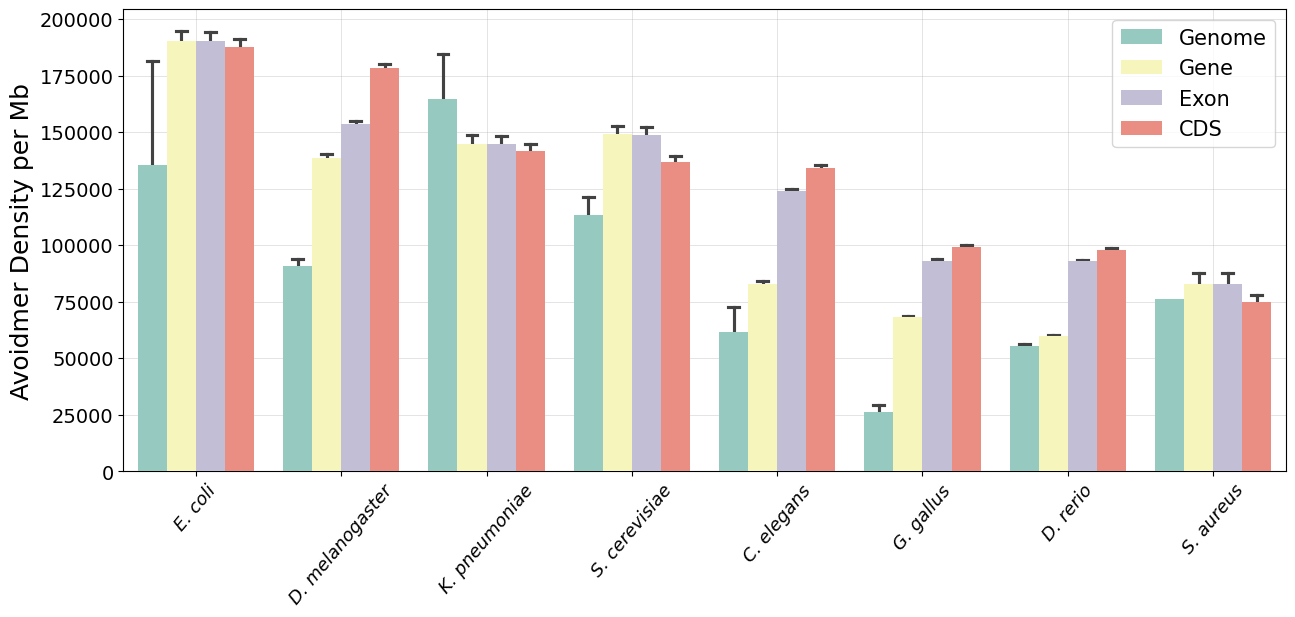

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.barplot(data=avoidmers_coverage_all, 
            x="name",
            y="coverage",
            dodge=True,
            width=0.8,
            hue="compartment",
            palette="Set3",
            ax=ax,
            capsize=.3,
           zorder=3,
           order=avoidmers_coverage_all[avoidmers_coverage_all['compartment'] == 'CDS']\
                .groupby("name")\
                .agg({"coverage": "mean"})\
                .sort_values(by=['coverage'], ascending=False)\
                .index\
                .tolist()
)

labels = ax.get_xticklabels()
for l in labels:
    l.set_style('italic')
    
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=13, rotation=50)
ax.legend(loc=0, title="")
ax.set_ylabel("Avoidmer Density per Mb")
ax.set_xlabel("")
ax.yaxis.label.set_size(18)
ax.legend(prop={"size": 15})

save_location = Path("model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/density_avoidmers_model_organisms.png", bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.barplot(data=avoidmers_coverage_all, 
            x="name",
            y="coverage",
            dodge=True,
            width=0.8,
            hue="compartment",
            palette="Set3",
            ax=ax,
            capsize=.05,
           zorder=3,
           order=avoidmers_coverage_all[avoidmers_coverage_all['compartment'] == 'CDS'].groupby("name").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False).index.tolist()
           )

labels = ax.get_xticklabels()
for l in labels:
    l.set_style('italic')
    
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=13, rotation=50)
ax.legend(loc=0, title="")
ax.set_ylabel("Avoidmer Density per Mb")
ax.set_xlabel("")
ax.yaxis.label.set_size(18)
ax.legend(prop={"size": 15})

save_location = Path("/storage/group/izg5139/default/external/zimie/model_organisms")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/density_avoidmers_model_organisms.png", bbox_inches='tight')